# Summary

All strategies:
  - Strategy 1: Correlation to one asset based on returns, one period behind, train up to 2024-01-01, correlation for all assets, fixed correlation in test period to calculate weights
  - Strategy 2: Like strategy 1 except with correlation based on prices
  - Strategy 3: Rolling correlation of returns based on last N periods, dynamically selected at each time step
  - Strategy 4: Rolling correlation of prices based on last N periods, dynamically selected at each time step
  - Strategy 5: Correlation to one asset based on returns, one period behind, trained up to 2024-01-01, correlation for only assets with correlation above threshold x
  - Strategy 6: Correlation to one asset based on prices, one period behind, trained up to 2024-01-01, correlation for only assets with correlation above threshold x
  - Strategy 7: Correlation to one asset based on returns, one period behind, train up to 2024-01-01, correlation for all assets, dynamic trailing correlation in test period to calculate weights

# Get Historical Data For Cryptocurrencies

In [1]:
from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd

# The universe is based on this snapshot from December 20, 2020: https://coinmarketcap.com/historical/20201220/

univ = [
    "BTCUSDT", "ETHUSDT", "ADAUSDT", "BNBUSDT", "XRPUSDT", "DOTUSDT", "MATICUSDT", "LTCUSDT", "BCHUSDT",
    "LINKUSDT", "XLMUSDT", "USDCUSDT", "EOSUSDT", "TRXUSDT", "XTZUSDT", "FILUSDT", "NEOUSDT", "DAIUSDT",
    "DASHUSDT", "VETUSDT", "ATOMUSDT", "AAVEUSDT", "UNIUSDT", "GRTUSDT", "THETAUSDT", "IOTAUSDT", "BUSDUSDT",
    "ZECUSDT", "YFIUSDT", "ETCUSDT", "WAVESUSDT", "COMPUSDT", "SNXUSDT", "DOGEUSDT", "MKRUSDT", "ZILUSDT",
    "SUSHIUSDT", "KSMUSDT", "OMGUSDT", "ONTUSDT", "ALGOUSDT", "EGLDUSDT", "BATUSDT", "DGBUSDT", "ZRXUSDT",
    "TUSDUSDT", "QTUMUSDT", "ICXUSDT", "AVAXUSDT", "RENUSDT", "HBARUSDT", "NEARUSDT", "LRCUSDT", "CELOUSDT",
    "KNCUSDT", "LSKUSDT", "OCEANUSDT", "QNTUSDT", "USTUSDT", "BANDUSDT", "MANAUSDT", "ENJUSDT", "ANTUSDT",
    "BNTUSDT", "ZENUSDT", "NMRUSDT", "RVNUSDT", "IOSTUSDT", "OXTUSDT", "CRVUSDT", "MATICUSDT", "HNTUSDT",
    "BALUSDT", "CHZUSDT"
]

should_download_stock_data = False

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
client = bnb_client(tld='US')


def get_binance_px(symbol, freq, start_ts = '2020-12-20'):
    data = client.get_historical_klines(symbol, freq, start_ts)
    columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume',
               'num_trades', 'taker_base_volume', 'taker_quote_volume', 'ignore']
    data = pd.DataFrame(data, columns = columns)
    
    # Convert from POSIX timestamp (number of millisecond since jan 1, 1970)
    data['open_time'] = data['open_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))
    data['close_time'] = data['close_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))
    return data 


if should_download_stock_data:
    freq = '4h'
    px = {}
    for x in univ:
        print(f"Downloading data for symbol {x}")
        data = get_binance_px(x, freq)
        px[x] = data.set_index('open_time')['close']

    px = pd.DataFrame(px).astype(float)
    px.to_csv('./class_project_input_prices.csv')
else:
    px = pd.read_csv('./class_project_input_prices.csv')
    date_format = "%Y-%m-%d %H:%M:%S"
    px['open_time'] = px['open_time'].apply(lambda t:  datetime.strptime(t, date_format))
    px.set_index('open_time', inplace=True)

# Data up to 2025-08-31 08:00:00
px

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,...,BNTUSDT,ZENUSDT,NMRUSDT,RVNUSDT,IOSTUSDT,OXTUSDT,CRVUSDT,HNTUSDT,BALUSDT,CHZUSDT
open_time,,,,,,,,,,,,,,,,,,,,,
2020-12-20 00:00:00,23353.97,646.62,0.16284,32.9681,0.56944,NaN,NaN,117.34,313.46,NaN,...,NaN,12.056,NaN,NaN,NaN,0.2492,NaN,1.41095,NaN,NaN
2020-12-20 04:00:00,23604.24,655.23,0.16638,33.6559,0.57916,NaN,NaN,121.30,340.00,NaN,...,NaN,12.107,NaN,NaN,NaN,0.2477,NaN,1.43156,NaN,NaN
2020-12-20 08:00:00,23549.50,652.88,0.16463,34.8228,0.57948,NaN,NaN,118.09,349.70,NaN,...,NaN,12.237,NaN,NaN,NaN,0.2477,NaN,1.44273,NaN,NaN
2020-12-20 12:00:00,23880.85,653.24,0.16542,35.0120,0.57798,NaN,NaN,119.10,361.21,NaN,...,NaN,12.074,NaN,NaN,NaN,0.2533,NaN,1.47130,NaN,NaN
2020-12-20 16:00:00,23932.71,649.82,0.16502,34.7042,0.57306,NaN,NaN,116.60,357.09,NaN,...,NaN,12.008,NaN,NaN,NaN,0.2503,NaN,1.43083,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,108921.64,4352.10,0.81950,856.7600,2.80720,3.816,NaN,110.23,542.00,23.36,...,0.725,7.240,16.62,0.01323,0.00342,0.0535,0.7646,NaN,NaN,0.03830
2025-08-30 20:00:00,108569.75,4374.56,0.82170,862.6200,2.81940,3.773,NaN,110.77,552.90,23.47,...,0.725,7.240,15.16,0.01323,0.00342,0.0535,0.7646,NaN,NaN,0.03830
2025-08-31 00:00:00,109155.73,4486.79,0.83590,863.4900,2.85180,3.867,NaN,111.67,551.30,23.90,...,0.764,7.240,15.21,0.01353,0.00342,0.0535,0.7936,NaN,NaN,0.04045


# Utility Functions

In [50]:
from ipynb.fs.full.utility_functions import calculate_correlation_directly
from ipynb.fs.full.utility_functions import calculate_covariance_directly


# time_point must be in the index of df
def get_train_test_data(df, time_point):
    train_data = df.loc[:time_point].iloc[:-1]
    test_data = df.loc[time_point:]
    return train_data, test_data


def get_coins_to_top_corr_coins(coin_data):
    coins_to_top_corr_coins = dict()
    for col in coin_data.columns:
        corr_with_coin = coin_data.shift().apply(lambda coin_col: calculate_correlation_directly(coin_col, coin_data[col]))
        
        sorted_corr_with_coin = corr_with_coin.sort_values()
        non_coin_corr = sorted_corr_with_coin[sorted_corr_with_coin.index != col]
        
        coins_not_ending_null = non_coin_corr[coin_data.iloc[-10:].notna().any()]
        coins_to_top_corr_coins[col] = coins_not_ending_null[coins_not_ending_null.abs() >= coins_not_ending_null.abs().max()].index[0]
    return coins_to_top_corr_coins


def get_coins_to_look_back_reg_params(train_data, coins_to_top_corr_coins):
    coins_to_look_back_reg_params = dict()
    
    for coin in train_data.columns:
        corr_coin = coins_to_top_corr_coins[coin]

        beta = calculate_covariance_directly(
            train_data[coin], train_data[corr_coin].shift()) / train_data[corr_coin].shift().var()

        val_input = train_data[corr_coin].shift().notna()
        val_output = train_data[coin].notna()

        inputs = train_data[corr_coin].shift()[val_input & val_output]
        outputs = train_data[coin][val_input & val_output]

        alpha = outputs.mean() - beta * inputs.mean()
        coins_to_look_back_reg_params[coin] = {"alpha": alpha, "beta": beta}
    
    return coins_to_look_back_reg_params

# Strategy 1: Correlation to one asset based on returns, one period behind, train up to 2024-01-01, correlation for all assets, fixed correlation in test period to calculate weights

In [52]:
from datetime import datetime

ret = px / px.shift() - 1
t = datetime(2024, 1, 1, 0, 0)
ret_train_data, ret_test_data = get_train_test_data(ret, t)

In [53]:
coins_to_top_corr_coins_by_ret = get_coins_to_top_corr_coins(ret_train_data)

In [54]:
coin_rets_to_look_back_reg_params = get_coins_to_look_back_reg_params(
    ret_train_data, coins_to_top_corr_coins_by_ret)

In [55]:
raw_reg_signal = pd.DataFrame(index=ret_test_data.index)
raw_reg_signal.index.names = ['Periods']

for coin in ret_test_data.columns:
    reg_ret = ret_test_data[coins_to_top_corr_coins_by_ret[coin]].shift() * coin_rets_to_look_back_reg_params[coin]['beta']
    reg_ret = reg_ret + coin_rets_to_look_back_reg_params[coin]['alpha']
    
    raw_reg_signal[coin] = -1 * (ret_test_data[coin] - reg_ret)

raw_reg_signal

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,...,BNTUSDT,ZENUSDT,NMRUSDT,RVNUSDT,IOSTUSDT,OXTUSDT,CRVUSDT,HNTUSDT,BALUSDT,CHZUSDT
Periods,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 04:00:00,-0.003658,-0.002871,-0.005351,-0.004713,-0.004893,0.001251,0.001503,-0.007418,-0.031742,-0.015881,...,-0.000464,0.017100,0.011466,0.001526,-0.001450,0.092314,0.018294,NaN,0.012474,0.010888
2024-01-01 08:00:00,-0.003825,-0.008452,-0.005368,0.004941,-0.009423,-0.009703,-0.021203,0.000118,0.003168,-0.005065,...,0.004729,-0.002247,-0.025017,-0.004765,-0.005415,0.038015,0.000104,NaN,0.004490,-0.025707
2024-01-01 12:00:00,-0.001619,-0.002889,-0.003508,-0.008938,-0.001253,-0.013977,-0.006370,-0.006301,0.007168,0.003146,...,-0.041600,-0.014756,-0.031622,-0.026272,0.001978,-0.009732,-0.008801,NaN,-0.075698,-0.015129
2024-01-01 16:00:00,-0.013210,-0.009476,-0.018389,0.004280,-0.006402,-0.027191,-0.009346,-0.002866,-0.012050,-0.012661,...,0.000250,-0.035243,-0.006095,-0.024660,-0.006404,-0.006871,-0.040695,NaN,-0.028948,-0.003603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,NaN,NaN,NaN,NaN,0.000053,NaN,NaN,NaN,0.005601,NaN,...,0.067950,-0.003230,-0.002987,0.000306,0.001969,NaN,NaN,NaN,NaN,NaN
2025-08-30 20:00:00,NaN,NaN,NaN,NaN,-0.004471,NaN,NaN,NaN,-0.019979,NaN,...,-0.000691,0.006335,0.088326,0.000446,0.001969,NaN,NaN,NaN,NaN,NaN
2025-08-31 00:00:00,NaN,NaN,NaN,NaN,-0.011617,NaN,NaN,NaN,0.003164,NaN,...,-0.054797,0.000034,-0.002662,-0.022370,0.001969,NaN,NaN,NaN,NaN,NaN


In [61]:
from ipynb.fs.full.utility_functions import get_rank_demeaned_normalized_signal, get_gross_returns_and_net_returns

normalized_signal = get_rank_demeaned_normalized_signal(raw_reg_signal)
test_px = px.loc[normalized_signal.index]

gross_returns, net_returns = get_gross_returns_and_net_returns(normalized_signal, test_px)

<Axes: title={'center': 'Strategy 1, Cumulative Gross Returns'}, xlabel='Periods'>

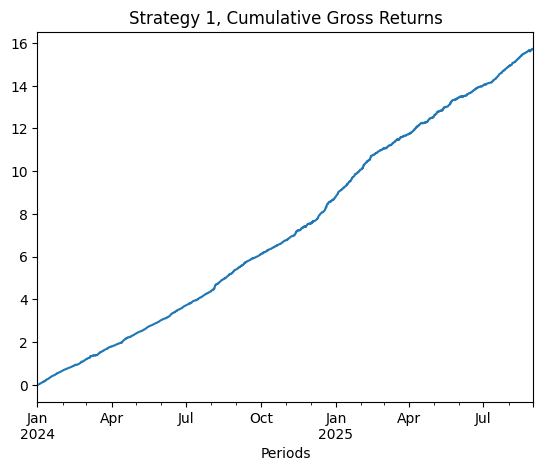

In [62]:
gross_returns.cumsum().plot(title="Strategy 1, Cumulative Gross Returns")

In [60]:
from ipynb.fs.full.utility_functions import get_strategy_stats

get_strategy_stats(net_returns, 4, test_px)

{'avg returns': 3.142919216184533,
 'volatility': 0.30060915490202444,
 'sharpe ratio': 10.455167997823898,
 'max drawdown': -2.171734649152701,
 'max drawdown duration': 20.5,
 'alpha_BTC': 0.0014284931838603918,
 'beta_BTC': 0.025542988957114085}

<Axes: title={'center': 'Strategy 1 And Benchmark, Cumulative Returns'}, xlabel='Periods'>

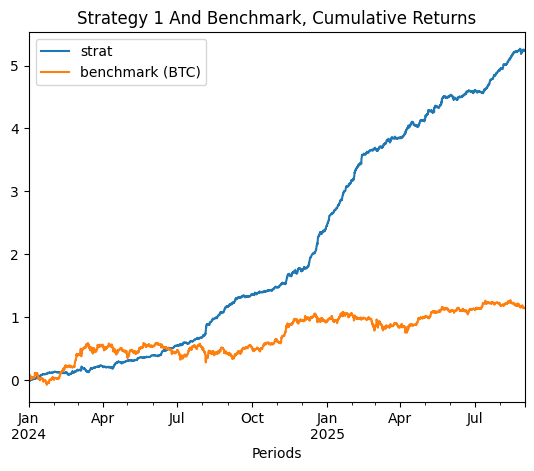

In [46]:
df = pd.DataFrame({
    "strat": net_returns,
    "benchmark (BTC)": test_px['BTCUSDT'] / test_px['BTCUSDT'].shift() - 1
})

df.cumsum().plot(title="Strategy 1 And Benchmark, Cumulative Returns")

In [37]:
net_returns

Periods
2024-01-01 00:00:00    0.000000
2024-01-01 04:00:00   -0.002000
2024-01-01 08:00:00    0.001004
2024-01-01 12:00:00   -0.001737
2024-01-01 16:00:00   -0.004407
                         ...   
2025-08-30 16:00:00    0.000346
2025-08-30 20:00:00    0.000416
2025-08-31 00:00:00   -0.008173
2025-08-31 04:00:00    0.004281
2025-08-31 08:00:00   -0.005060
Length: 3651, dtype: float64

In [38]:
test_btc_rets = test_px['BTCUSDT'] / test_px['BTCUSDT'].shift() - 1
test_btc_rets

Periods
2024-01-01 00:00:00         NaN
2024-01-01 04:00:00    0.003994
2024-01-01 08:00:00    0.004152
2024-01-01 12:00:00    0.001945
2024-01-01 16:00:00    0.013536
                         ...   
2025-08-30 16:00:00    0.000563
2025-08-30 20:00:00   -0.003231
2025-08-31 00:00:00    0.005397
2025-08-31 04:00:00   -0.004536
2025-08-31 08:00:00   -0.001736
Name: BTCUSDT, Length: 3651, dtype: float64

<Axes: title={'center': 'Cumulative Returns: Strat 1, Benchmark, De-Correlated Strat 1'}, xlabel='Periods'>

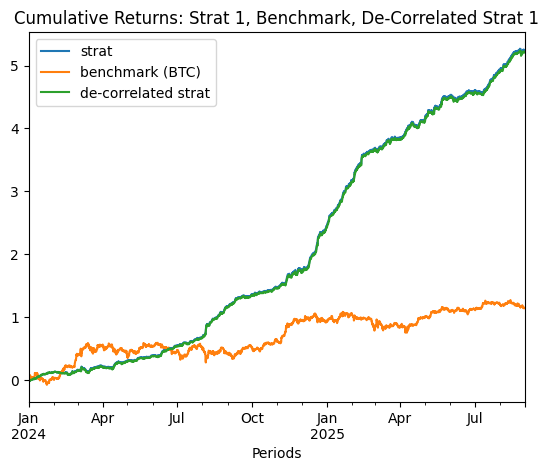

In [48]:
from ipynb.fs.full.utility_functions import get_de_correlated_returns

df = pd.DataFrame({
    "strat": non_na_period_net_returns,
    "benchmark (BTC)": non_na_period_test_btc_rets,
    "de-correlated strat": get_de_correlated_returns(net_returns, test_btc_rets)
})

df.cumsum().plot(title = "Cumulative Returns: Strat 1, Benchmark, De-Correlated Strat 1")

# Strategy 2: Like strategy 1 except with correlation based on prices

In [10]:
t = datetime(2024, 1, 1, 0, 0)
px_train_data, px_test_data = get_train_test_data(px, t)
coins_to_top_corr_coins_by_px = get_coins_to_top_corr_coins(px_train_data)

coins_to_top_corr_coins_by_px

{'BTCUSDT': 'ICXUSDT',
 'ETHUSDT': 'WAVESUSDT',
 'ADAUSDT': 'DOTUSDT',
 'BNBUSDT': 'DOTUSDT',
 'XRPUSDT': 'CRVUSDT',
 'DOTUSDT': 'OXTUSDT',
 'MATICUSDT': 'XTZUSDT',
 'LTCUSDT': 'ONTUSDT',
 'BCHUSDT': 'NEOUSDT',
 'LINKUSDT': 'AAVEUSDT',
 'XLMUSDT': 'ONTUSDT',
 'USDCUSDT': 'HBARUSDT',
 'EOSUSDT': 'OXTUSDT',
 'TRXUSDT': 'LSKUSDT',
 'XTZUSDT': 'ZILUSDT',
 'FILUSDT': 'ENJUSDT',
 'NEOUSDT': 'FILUSDT',
 'DAIUSDT': 'LTCUSDT',
 'DASHUSDT': 'ZECUSDT',
 'VETUSDT': 'DOTUSDT',
 'ATOMUSDT': 'RVNUSDT',
 'AAVEUSDT': 'NEOUSDT',
 'UNIUSDT': 'FILUSDT',
 'GRTUSDT': 'NEOUSDT',
 'THETAUSDT': 'WAVESUSDT',
 'IOTAUSDT': 'OCEANUSDT',
 'BUSDUSDT': 'TUSDUSDT',
 'ZECUSDT': 'NEARUSDT',
 'YFIUSDT': 'ENJUSDT',
 'ETCUSDT': 'ZILUSDT',
 'WAVESUSDT': 'FILUSDT',
 'COMPUSDT': 'AAVEUSDT',
 'SNXUSDT': 'AAVEUSDT',
 'DOGEUSDT': 'AAVEUSDT',
 'MKRUSDT': 'ZENUSDT',
 'ZILUSDT': 'MANAUSDT',
 'SUSHIUSDT': 'ENJUSDT',
 'KSMUSDT': 'CELOUSDT',
 'OMGUSDT': 'OXTUSDT',
 'ONTUSDT': 'DOTUSDT',
 'ALGOUSDT': 'BATUSDT',
 'EGLDUSDT': 'DOTUSDT',


In [13]:
coin_px_to_look_back_reg_params = get_coins_to_look_back_reg_params(
    px_train_data, coins_to_top_corr_coins_by_px)

coin_px_to_look_back_reg_params

{'BTCUSDT': {'alpha': 3142.5272557474673, 'beta': 136309.8840414844},
 'ETHUSDT': {'alpha': 724.3363277610395, 'beta': 601.1441700058688},
 'ADAUSDT': {'alpha': 0.09908341178218644, 'beta': 0.046301768607915045},
 'BNBUSDT': {'alpha': 201.80711807420755, 'beta': 11.169448929405899},
 'XRPUSDT': {'alpha': 0.5869960840541283, 'beta': 0.004371269641549738},
 'DOTUSDT': {'alpha': 7.1201451841746515, 'beta': 17.00568680055058},
 'MATICUSDT': {'alpha': -0.2612696016542455, 'beta': 1.2025321807173508},
 'LTCUSDT': {'alpha': 49.454047935717924, 'beta': 124.84902573210813},
 'BCHUSDT': {'alpha': 75.70494047450902, 'beta': 10.91616213736539},
 'LINKUSDT': {'alpha': 7.785330380626809, 'beta': 0.013538585774012611},
 'XLMUSDT': {'alpha': 0.05577740744574014, 'beta': 0.2802595907322673},
 'USDCUSDT': {'alpha': 0.997736909492336, 'beta': 0.04026071865334523},
 'EOSUSDT': {'alpha': 1.070011728394292, 'beta': 1.0683740871194807},
 'TRXUSDT': {'alpha': 0.03652458204256304, 'beta': 0.025598902232009963}